In [292]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import sys, os
import numpy as np
import lumapi
import utils

In [293]:
emeApi = lumapi.MODE()
emeApi.importmaterialdb('silicon_thermal.mdf')

In [294]:
um = 1e-6
nm = 1e-9

thickness = 0.22*um
thick_BOX = 2*um

W_bragg = 1530*nm

width = 0.5*um # Waveguide width
Delta_W = 20*nm # Corrugation width
W_great = width+ Delta_W
W_small = width - Delta_W

L_pd = 324*nm # Grating period

material_Si ='silicon_thermal' #"Si (Silicon) - Palik"
material_BOX = "SiO2 (Glass) - Palik"

w_box = 2*width
t_box = 2*um
nb = 10000
wvg = np.linspace(1500e-9, 1600e-9, nb)


## FDE

In [295]:
group_index_high ,neff_high,group_index_low,neff_low = utils.construir_bragg_e_retornar_indices_efetivos(emeApi,L_pd,W_great,W_small,thickness,material_Si,material_BOX,3*width,3*thickness,3*W_great,3*thickness,Temperatura=298)
print("high index - ng = ", group_index_high," neff = ", neff_high)

print("low index - ng = ", group_index_low," neff = ", neff_low)

high index - ng =  4.4553724803625165  neff =  2.3905992783947383
low index - ng =  4.357813467947367  neff =  2.456719556901164


In [296]:
Lambda = W_bragg/((neff_low+neff_high))
print("Lambda = ", Lambda*1e9, " nm")

Lambda =  315.63840795023793  nm


## EME

In [297]:
S = np.linspace(0,0.004,100)
variacao_apenas_em_x = True
variacao_apenas_em_y = True

print(S*1e3," milistrain")
Lambda_strain = Lambda*(1+S)
print(Lambda_strain*1e9, "nm")

[0.         0.04040404 0.08080808 0.12121212 0.16161616 0.2020202
 0.24242424 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444
 0.48484848 0.52525253 0.56565657 0.60606061 0.64646465 0.68686869
 0.72727273 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293
 0.96969697 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717
 1.21212121 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141
 1.45454545 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566
 1.6969697  1.73737374 1.77777778 1.81818182 1.85858586 1.8989899
 1.93939394 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414
 2.18181818 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838
 2.42424242 2.46464646 2.50505051 2.54545455 2.58585859 2.62626263
 2.66666667 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687
 2.90909091 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111
 3.15151515 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535
 3.39393939 3.43434343 3.47474747 3.51515152 3.55555556 3.595959

In [298]:
phases = 1

Reflectance = []
S11_modulo = []
S11_fase = []
S21_modulo = []
S21_fase = []
for i in range(len(S)):
    if(variacao_apenas_em_x):
        R, S11M, S11F,S21M,S21F = utils.bragg_integrado_com_phase_shifter(emeApi,Lambda*(1+S[i]),W_great,W_small,width,thickness,
                                                                          w_box,t_box,material_Si,material_BOX,wvg[0],wvg[-1],nb,periods=75,
                                                                            Phases=phases)
    
    Reflectance.append(R)
    S11_modulo.append(S11M)
    S11_fase.append(S11F)
    S21_modulo.append(S21M)
    S21_fase.append(S21F)
    

In [299]:
 
frequencia_central,_ = utils.analise_comprimento_de_onda_para_sensor(S,S21_modulo, wvg*1e9,1546.624662,1550.885029)
print(frequencia_central)

[1546.624662 1546.664666 1546.70467  1546.744674 1546.774677 1546.814681
 1546.854685 1546.884688 1546.924692 1546.964696 1546.994699 1547.034703
 1547.074707 1547.114711 1547.144714 1547.184718 1547.224722 1547.254725
 1547.294729 1547.334733 1547.364736 1547.40474  1547.444744 1547.484748
 1547.514751 1547.554755 1547.594759 1547.624762 1547.664766 1547.70477
 1547.734773 1547.774777 1547.814781 1547.854785 1547.884788 1547.924792
 1547.964796 1547.994799 1548.034803 1548.074807 1548.10481  1548.144814
 1548.184818 1548.214821 1548.254825 1548.294829 1548.334833 1548.364836
 1548.40484  1548.444844 1548.474847 1548.514851 1548.554855 1548.584858
 1548.624862 1548.664866 1548.70487  1548.734873 1548.774877 1548.814881
 1548.844884 1548.884888 1548.924892 1548.954895 1548.994899 1549.034903
 1549.064906 1549.10491  1549.144914 1549.184918 1549.214921 1549.254925
 1549.294929 1549.324932 1549.364936 1549.40494  1549.434943 1549.474947
 1549.514951 1549.544954 1549.584958 1549.624962 154

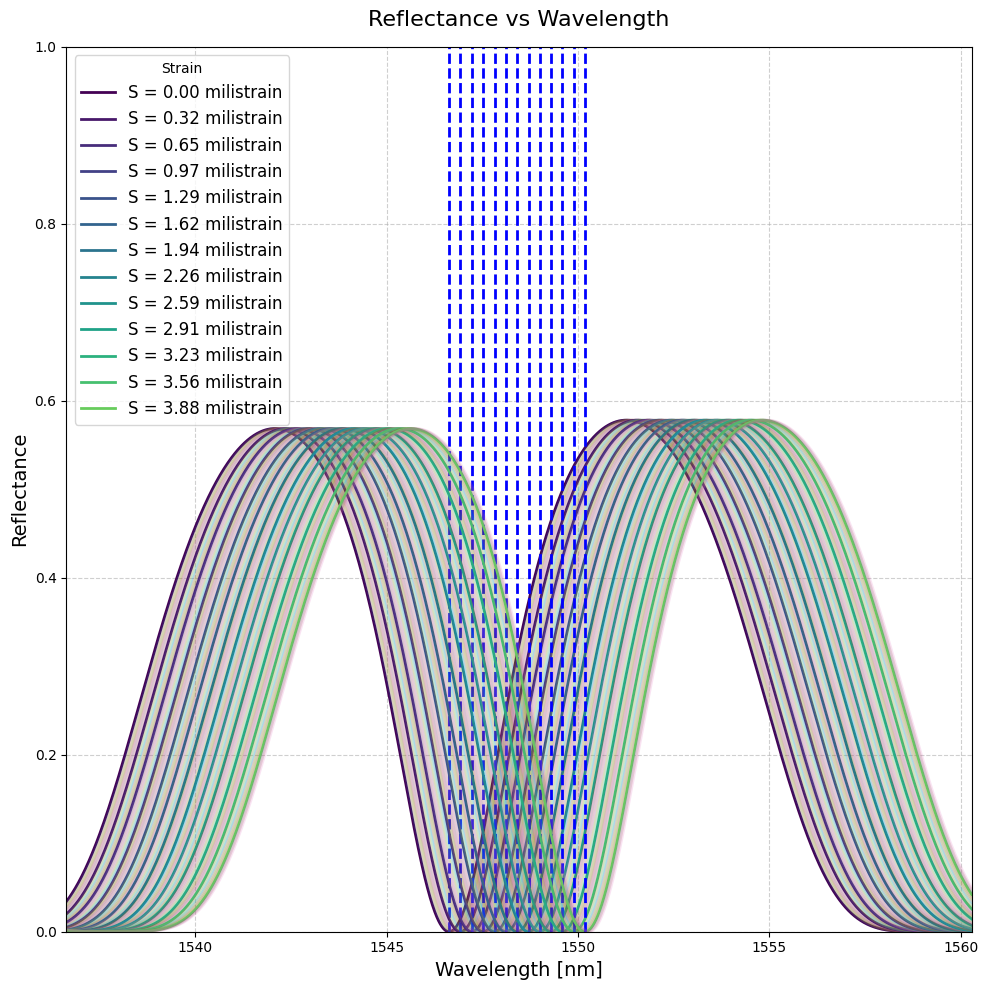

In [300]:
cmap = plt.cm.viridis 

plt.figure(figsize=(10, 10))

for i in range(len(S)):
    if (i%8 == 0):
        plt.plot(
            wvg * 1e9,
            Reflectance[i],
            markerfacecolor='none',  # bola vazada
            markersize=6,
            linewidth=2,
            color=cmap(0.8*i/len(S)),
            label = f"S = {S[i]*1e3:.2f} milistrain"
        )
        plt.axvline(
            x=frequencia_central[i],
            linestyle = "--",
            color='blue',
            markerfacecolor='none',  # bola vazada
            markersize=8,
            linewidth=2    )

    else:
        plt.plot(
            wvg * 1e9,
            Reflectance[i],
            markerfacecolor='none',  # bola vazada
            markersize=6,
            alpha = 0.2,
            linewidth=2,
        )
    
plt.xlim(frequencia_central[0]-10, frequencia_central[-1]+10)
plt.ylim(0, 1)

plt.xlabel("Wavelength [nm]", fontsize=14)
plt.ylabel("Reflectance", fontsize=14)
plt.title("Reflectance vs Wavelength", fontsize=16, pad=15)
plt.legend(title="Strain", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig(os.getcwd() + fr"\RESULTADOS2\Reflectance_vs_wavelength_zerostrain.png", dpi=300, bbox_inches="tight")

plt.show()

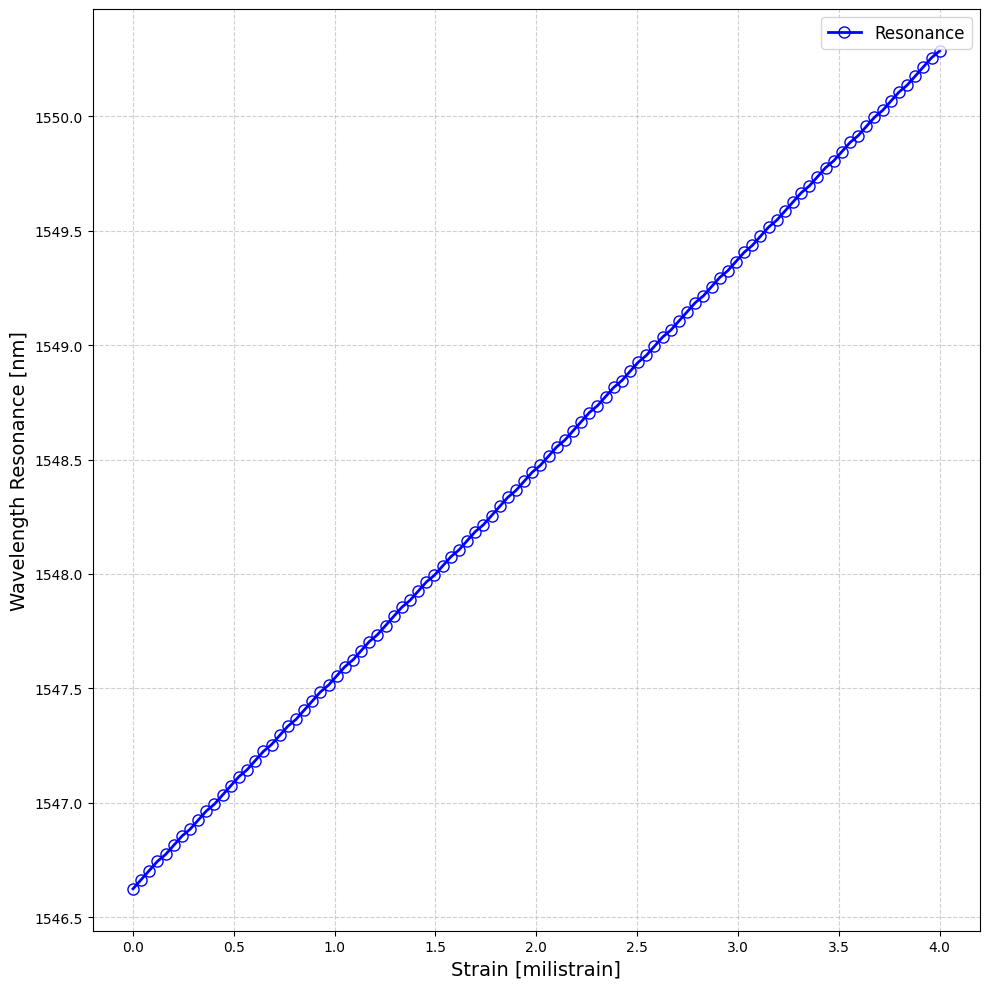

In [301]:
plt.figure(figsize=(10, 10))
plt.plot(
    S*1e3,
    frequencia_central,
    '-o',
    color='blue',
    markerfacecolor='none',  # bola vazada
    markersize=8,
    linewidth=2,
    label="Resonance"
)

plt.xlabel("Strain [milistrain]", fontsize=14)
plt.ylabel("Wavelength Resonance [nm]", fontsize=14)

plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig(os.getcwd() + fr"\RESULTADOS2\ressonancia_vs_strain.png", dpi=300, bbox_inches="tight")

plt.show()


In [302]:
S11 = np.zeros((len(wvg), 2*len(S)))
S21 = np.zeros((len(wvg), 2*len(S)))

for i in range(0,len(S),1):
    S11[:,2*i] = S11_modulo[i]
    S11[:,2*i+1] = S11_fase[i]

    S21[:,2*i] = S21_modulo[i]
    S21[:,2*i+1] = S21_fase[i]


In [303]:
filepath = os.getcwd() + fr"\BRAGG STRAIN PHASE SHIFTER"
tamanho = len(os.listdir(filepath))

for i in range(tamanho):
    os.remove(os.getcwd() + fr"\BRAGG STRAIN PHASE SHIFTER\bragg_strain_{i+1}.dat")

In [304]:

# Parâmetros
c = 3e8
coln = 3
TM = np.transpose(S)
numMode = 1  # 1 modo
numPort = 2  # 2 portas
modeLabel = ["TE"]  # lista com rótulos de modos

for i in range(len(S)):
    filename = os.getcwd() + fr"\BRAGG STRAIN PHASE SHIFTER\bragg_strain_{i+1}.dat"
    with open(filename, "w") as f:
        for kk in range(numMode):
            for mm in range(numPort):  # porta de saída
                for nn in range(numPort):  # porta de entrada
                            mystr = (
                                f"(\"port {mm+1}\",\"{modeLabel[kk]}\",{kk+1},"
                                f"\"port {nn+1}\",1,\"modulation\")\n"
                                f"(1,{1})\n"
                            )
                            f.write(mystr)

                            f.write(f"{S[i]:.5f}" + "\n")

                            f.write(f"({len(wvg)},{coln})\n")

                            # Seleciona o conjunto de dados correto
                            if mm == 0 and nn == 0 and kk == 0:  # S11
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))
                            elif mm == 1 and nn == 0 and kk == 0:  # S21
                                mymtrx = np.column_stack((c / wvg, S21[:,2*i:2*i+2]))
                            else:
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))

                            # Escreve os dados numéricos
                            np.savetxt(f, mymtrx, fmt="%.6e", delimiter="\t")


In [305]:
x_max_S2 = 1550.285029
x_max_S1 = 1546.624662
interacoes = 30
qtd_laser = 2
defasagem = x_max_S2-x_max_S1
if (interacoes>1):
    defasagem = np.linspace(0.5,(x_max_S2-x_max_S1), interacoes) 


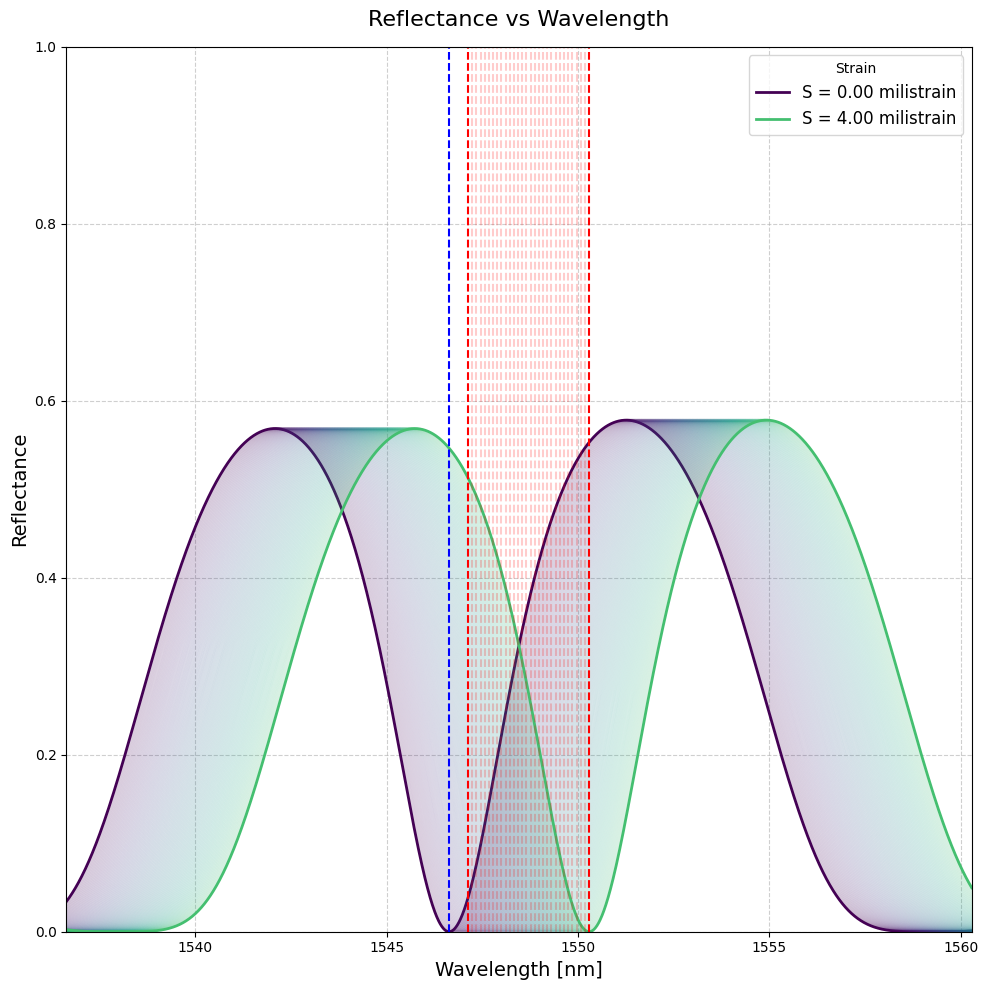

In [306]:

cmap = plt.cm.viridis(np.linspace(0, 0.7, len(S)))

plt.figure(figsize=(10, 10))

for i in range(len(S)):
    if (i%99 == 0):
        plt.plot(
            wvg * 1e9,
            Reflectance[i],
            markerfacecolor='none',  # bola vazada
            markersize=6,
            linewidth=2,
            color=cmap[i],
            label = f"S = {S[i]*1e3:.2f} milistrain"
        )
    else:
        plt.plot(
            wvg * 1e9,
            Reflectance[i],
            markerfacecolor='none',  # bola vazada
            markersize=6,
            alpha = 0.1,
            color= cmap[i],
            linewidth=2,
        )

plt.axvline(x=x_max_S1, color ="blue", linestyle ='--')

if (interacoes >1):
    for j in range(interacoes):
        x_max_S2=x_max_S1 + defasagem[j]
        if(j%(interacoes-1) == 0):
            plt.axvline(x=x_max_S2, color ="red",alpha=1, linestyle ='--')
        else:
            plt.axvline(x=x_max_S2, color ="red",alpha=0.2, linestyle ='--')
else:
    plt.axvline(x=x_max_S1+defasagem, color ="red", linestyle ='--')

plt.xlim(x_max_S1 - 10, x_max_S2 + 10)
plt.ylim(0, 1)

plt.xlabel("Wavelength [nm]", fontsize=14)
plt.ylabel("Reflectance", fontsize=14)
plt.title("Reflectance vs Wavelength", fontsize=16, pad=15)

plt.legend(title="Strain", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig(os.getcwd() + fr"\RESULTADOS2\Reflectance_vs_wavelength_strain_com_comprimentos_dos_lasers.png", dpi=300, bbox_inches="tight")

plt.show()



In [307]:
pmS1 = np.zeros([len(S),interacoes])
pmS2 = np.zeros([len(S),interacoes])
pmS3 = np.zeros([len(S),interacoes])
pmS4 = np.zeros([len(S),interacoes])
inter = lumapi.INTERCONNECT()

for j in range(interacoes):
    for i in range(len(S)):
        if(interacoes>1):
            P1,P2 = utils.funcao_que_gera_o_ambiente_de_simulacao_e_calcula_a_potencia_na_saida_de_n_laser(inter,x_max_S1*1e-9,defasagem[j]*1e-9,os.getcwd() +fr"\BRAGG STRAIN PHASE SHIFTER\bragg_strain_{i+1}.dat")
        else:
            P1,P2 = utils.funcao_que_gera_o_ambiente_de_simulacao_e_calcula_a_potencia_na_saida_de_n_laser(inter,x_max_S1*1e-9,defasagem*1e-9,os.getcwd() +fr"\BRAGG STRAIN PHASE SHIFTER\bragg_strain_{i+1}.dat")
            
            if(qtd_laser == 3):
                P3,P4 = utils.funcao_que_gera_o_ambiente_de_simulacao_e_calcula_a_potencia_na_saida_de_n_laser(inter,x_max_S1*1e-9+defasagem*1e-9,defasagem*1e-9,os.getcwd() +fr"\BRAGG STRAIN PHASE SHIFTER\bragg_strain_{i+1}.dat")
                pmS3[i,j] = P3
                pmS4[i,j] = P4
        pmS1[i,j] = P1
        pmS2[i,j] = P2


In [308]:
if interacoes == 1:
    plt.figure(figsize=(10, 10))

    for j in range(interacoes):
        plt.plot(
            S*1e3, pmS1[:,j],
            '-o',
            markerfacecolor='none',
            markersize=7,
            linewidth=2,
            linestyle = "-",
            color = "blue"
        )

        plt.plot(
            S*1e3, pmS2[:,j],
            '-o',
            markerfacecolor='none',
            markersize=7,
            linewidth=2,
            color = "red",
            label=fr"$\Delta \lambda$ = {defasagem:.2f} nm"
        )
        
    plt.xlabel("S [milistrain]", fontsize=14)
    plt.ylabel("Power [dBm]", fontsize=14)
    plt.title("Power vs Strain", fontsize=16, pad=15)

    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    plt.savefig(os.getcwd() + fr"\RESULTADOS2\potencia_vs_strain.png", dpi=300, bbox_inches="tight")

    plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:75: SyntaxWarning: invalid escape sequence '\D'
<>:85: SyntaxWarning: invalid escape sequence '\D'
<>:98: SyntaxWarning: invalid escape sequence '\R'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:75: SyntaxWarning: invalid escape sequence '\D'
<>:85: SyntaxWarning: invalid escape sequence '\D'
<>:98: SyntaxWarning: invalid escape sequence '\R'
C:\Users\gson5\AppData\Local\Temp\ipykernel_11660\492206099.py:16: SyntaxWarning: invalid escape sequence '\D'
  label = f"$\Delta \lambda$ = {defasagem[j]:.2f} nm"
C:\Users\gson5\AppData\Local\Temp\ipykernel_11660\492206099.py:26: SyntaxWarning: invalid escape sequence '\D'
  label = f"$\Delta \lambda$ = {defasagem[j]:.2f} nm"
C:\Users\gson5\AppData\Local\Temp\ipykernel_11660\49220609

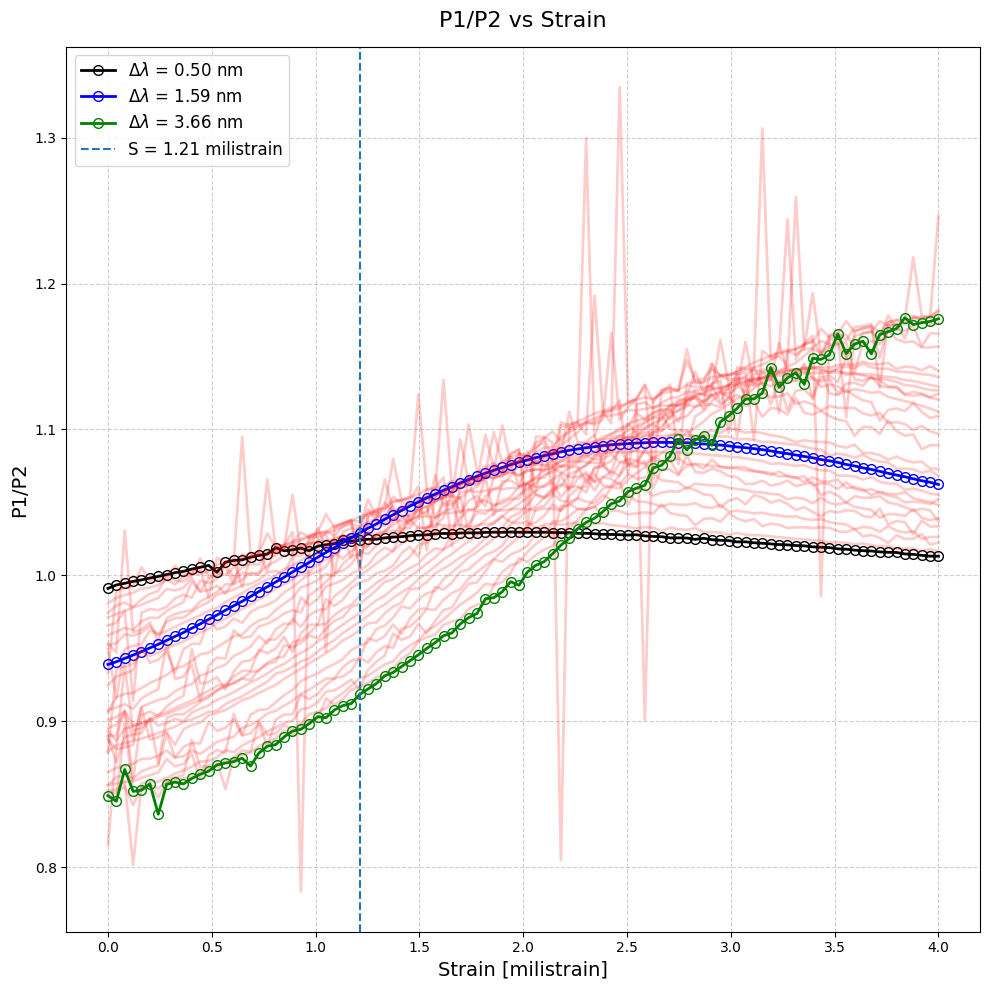

In [318]:
indice_do_vetor_ate_onde_a_razao_eh_linear = 30

if (interacoes>1):
    plt.figure(figsize=(10, 10))

    for j in range(interacoes):
        
        if j==0:
            plt.plot(
                S*1e3, np.array(pmS1[:,j])/np.array(pmS2[:,j]),
                '-o',
                color="black",
                markerfacecolor='none',
                markersize=7,
                linewidth=2,
                label = f"$\Delta \lambda$ = {defasagem[j]:.2f} nm"
            )
        elif j==10:
            plt.plot(
                S*1e3, np.array(pmS1[:,j])/np.array(pmS2[:,j]),
                '-o',
                color="blue",
                markerfacecolor='none',
                markersize=7,
                linewidth=2,
                label = f"$\Delta \lambda$ = {defasagem[j]:.2f} nm"
            )
        elif j==29:
            plt.plot(
                S*1e3, np.array(pmS1[:,j])/np.array(pmS2[:,j]),
                '-o',
                color="green",
                markerfacecolor='none',
                markersize=7,
                linewidth=2,
                label = f"$\Delta \lambda$ = {defasagem[j]:.2f} nm"
            )
        else:
            plt.plot(
                S*1e3, np.array(pmS1[:,j])/np.array(pmS2[:,j]),
                '-',
                color='red',
                markerfacecolor='none',
                markersize=7,
                linewidth=2,
                alpha = 0.2
            )

    
    plt.axvline(x=S[indice_do_vetor_ate_onde_a_razao_eh_linear]*1e3, linestyle="--",
                 label =f"S = {S[indice_do_vetor_ate_onde_a_razao_eh_linear]*1e3:.2f} milistrain")

    plt.xlabel("Strain [milistrain]", fontsize=14)
    plt.ylabel("P1/P2", fontsize=14)
    plt.title("P1/P2 vs Strain", fontsize=16, pad=15)

    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    plt.savefig(os.getcwd() + fr"\RESULTADOS2\razao_potencia_vs_strain.png", dpi=300, bbox_inches="tight")

    plt.show()
else:
    plt.figure(figsize=(10, 10))

    # Linha 1 com bolas vazadas
    plt.plot(
        S*1e3, pmS1[:,0]/pmS2[:,0],
        '-o',
        color='blue',
        markerfacecolor='none',
        markersize=7,
        linewidth=2,
        label=f"$\Delta \lambda$  = {defasagem:.2f} nm"
    )
    if(qtd_laser==3):
        plt.plot(
            S*1e3, pmS3[:,0]/pmS4[:,0],
            '-o',
            color='red',
            markerfacecolor='none',
            markersize=7,
            linewidth=2,
            label=f"$\Delta \lambda$ = {2*defasagem:.2f} nm"
        )
    # Labels e título
    plt.xlabel("S [milistrain]", fontsize=14)
    plt.ylabel("Power [dBm]", fontsize=14)
    plt.title("Power vs Strain", fontsize=16, pad=15)

    # Estética
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    # Salvar em alta resolução
    plt.savefig(os.getcwd() + "\RESULTADOS2\potencia_vs_strain.png", dpi=300, bbox_inches="tight")

    plt.show()


In [330]:
indice_do_grafico = 0


razao=np.array(pmS1[:,indice_do_grafico])/np.array(pmS2[:,indice_do_grafico])
razao_ajustada = razao[0:indice_do_vetor_ate_onde_a_razao_eh_linear]
S_ajustado = S[0:indice_do_vetor_ate_onde_a_razao_eh_linear]

a, b = np.polyfit(S_ajustado*1e-3, razao_ajustada, 1)
y_fit = a*S_ajustado*1e-3 + b

sensibilidade = (razao[indice_do_vetor_ate_onde_a_razao_eh_linear-3]-razao[0])/((S[indice_do_vetor_ate_onde_a_razao_eh_linear-3]-S[0]))
sensibilidade_fit = (y_fit[indice_do_vetor_ate_onde_a_razao_eh_linear-1]-y_fit[0])/((S_ajustado[indice_do_vetor_ate_onde_a_razao_eh_linear-1]-S_ajustado[0]))
erro_percentual = np.abs((razao_ajustada - y_fit) / razao_ajustada) * 100
erro_medio = np.mean(erro_percentual)
desvio_padrao_do_erro_percentual = np.std(erro_percentual)

print(sensibilidade, "por milistrain")
print(sensibilidade_fit, "por milistrain")
print(f"Erro percentual medio= {erro_medio:.3f} %")
print("Desvio padrao do erro percentual =", desvio_padrao_do_erro_percentual)


28.073687457383542 por milistrain
27.69198078130521 por milistrain
Erro percentual medio= 0.089 %
Desvio padrao do erro percentual = 0.10957118343940295


<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
C:\Users\gson5\AppData\Local\Temp\ipykernel_11660\2311958550.py:14: SyntaxWarning: invalid escape sequence '\D'
  label = f"$\Delta \lambda$ = {defasagem[j] if (interacoes>1) else defasagem:.2f} nm"
C:\Users\gson5\AppData\Local\Temp\ipykernel_11660\2311958550.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

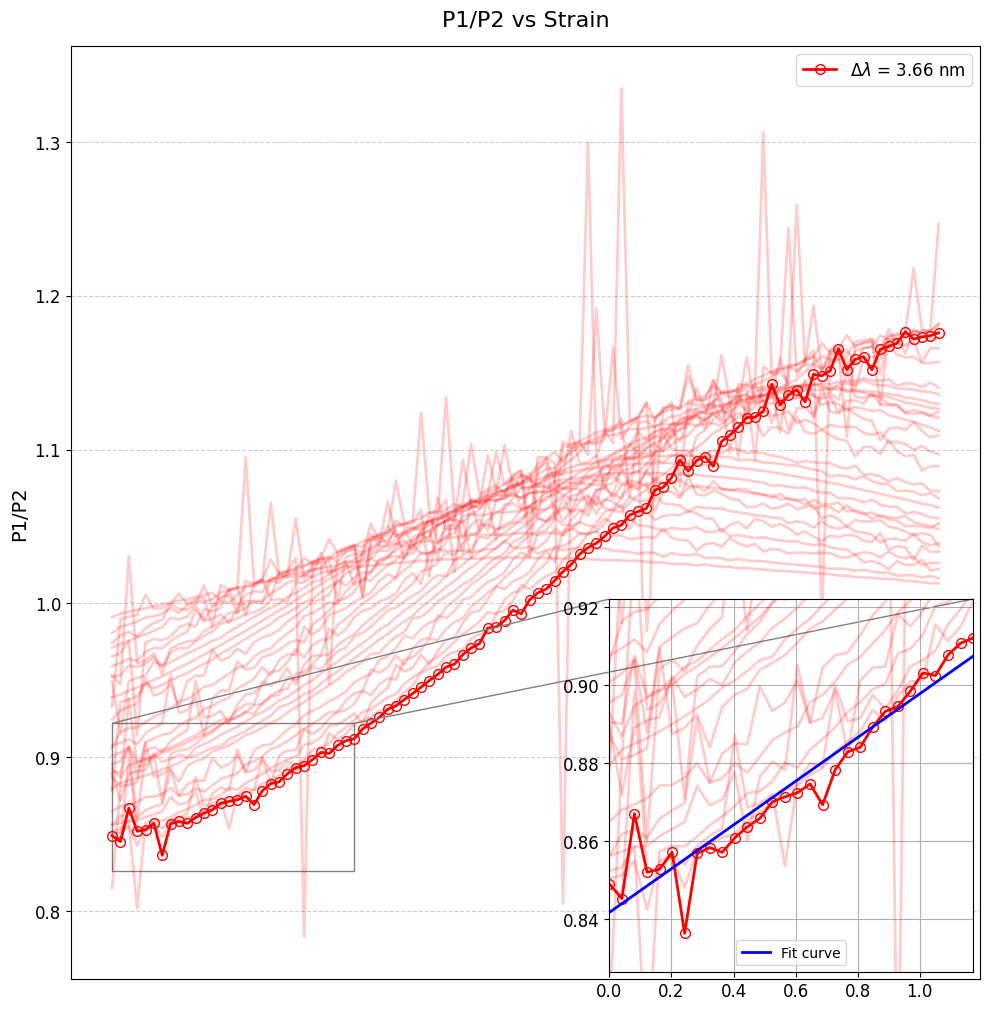

In [328]:
plt.figure(figsize=(10, 10))

fig, ax = plt.subplots(figsize=(10, 10))

for j in range(interacoes):
    if j==indice_do_grafico:
        ax.plot(
            S*1e3, np.array(pmS1[:,j])/np.array(pmS2[:,j]),
            '-o',
            color="red",
            markerfacecolor='none',
            markersize=7,
            linewidth=2,
            label = f"$\Delta \lambda$ = {defasagem[j] if (interacoes>1) else defasagem:.2f} nm"
        )
    else:
        ax.plot(
            S*1e3, np.array(pmS1[:,j])/np.array(pmS2[:,j]),
            '-',
            color='red',
            markerfacecolor='none',
            markersize=7,
            linewidth=2,
            alpha = 0.2
        )
ax.set_xlabel("Strain [milistrain]", fontsize=14)
ax.set_ylabel("P1/P2", fontsize=14)
ax.set_title("P1/P2 vs Strain", fontsize=16, pad=15)
ax.legend(fontsize=12)
ax.grid(True, linestyle="--", alpha=0.6)
ax.xaxis.set_visible(False)  # remove o eixo x e os ticks
ax.tick_params(axis='both', which='major', labelsize=12)  # muda tamanho dos números do eixo x e y

# Criando o inset (zoom)
axins = inset_axes(ax, width="40%", height="40%", loc='lower right')

for j in range(interacoes):
    y = np.array(pmS1[:, j]) / np.array(pmS2[:, j])
    if j == indice_do_grafico:
        axins.plot(
            S*1e3, y,
            '-o',
            color="red",
            markerfacecolor='none',
            markersize=7,
            linewidth=2
        )
    else:
        axins.plot(
            S*1e3, y,
            '-',
            color='red',
            alpha=0.2,
            linewidth=2
        )

axins.plot(
            S_ajustado*1e3, y_fit,
            '-',
            color='blue',
            alpha=1,
            linewidth=2,
            label = "Fit curve"
        )

# Limites do zoom — ajuste conforme região que deseja destacar
x1, x2 = S[0]*1e3, S[indice_do_vetor_ate_onde_a_razao_eh_linear-1]*1e3  # exemplo de limites no eixo x
y1, y2 = min(razao_ajustada)-0.01, max(razao_ajustada)+0.01  # exemplo de limites no eixo y
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.legend()
axins.grid()

# Linha que conecta inset ao gráfico principal
mark_inset(ax, axins, loc1=(1), loc2=2, fc="none", ec="0.5")
axins.tick_params(axis='both', which='major', labelsize=12)  # muda tamanho dos números do eixo x e y

plt.tight_layout()
plt.savefig(os.getcwd() + fr"\RESULTADOS2\razao_potencia_e_fit_vs_strain.png", dpi=300, bbox_inches="tight")
plt.show()
